In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np

In [2]:
path = './input/'
filename_dual_wide_ontop = path + '04_Dual_wide_on_top.txt'
filename_triple_wide_infront = path + '04_Triple_wide.txt'
filename_triple_wide_infront_U = path + '04_Triple_wide_U.txt'

In [3]:
f = open(filename_dual_wide_ontop)
lines = f.read().splitlines()
f.close()
for i, line in enumerate(lines):
    if i < 10:
        print(i, line)

0 
1 ShotNo  StrNo  RecNo  Offset:m  MidPtX:m  MidPtY:m  DipSrc:°  DipRec:°  AzSrc:°  
2 1       1      1      408.551   19334.4   19650     11.6295   168.37    119.342  
3 1       1      2      402.58    19334.4   19643.8   11.4646   168.535   117.739  
4 1       1      3      396.912   19334.4   19637.5   11.3054   168.695   116.206  
5 1       1      4      391.561   19334.4   19631.2   11.1579   168.842   114.506  
6 1       1      5      386.541   19334.4   19625     11.0176   168.982   112.834  
7 1       1      6      381.864   19334.4   19618.8   10.8876   169.112   111.127  
8 1       1      7      377.543   19334.4   19612.5   10.7674   169.233   109.296  
9 1       1      8      373.591   19334.4   19606.2   10.6573   169.343   107.572  


In [4]:
df_dual_wide_ontop_raw = pd.DataFrame()
df_triple_wide_infront_raw = pd.DataFrame()
df_triple_wide_infront_U_raw = pd.DataFrame()

In [5]:
column_names = ['ShotNo', 'StrNo', 'RecNo', 'Offset', 'MidPtX', 'MidPtY', 'DipSrc', 'DipRec', 'AzSrc']

In [6]:
rowstoskip = 2

In [7]:
df_dual_wide_ontop_raw = pd.read_csv(filename_dual_wide_ontop, names=column_names, skiprows=rowstoskip, delim_whitespace=True)
df_triple_wide_infront_raw = pd.read_csv(filename_triple_wide_infront, names=column_names, skiprows=rowstoskip, delim_whitespace=True)
df_triple_wide_infront_U_raw = pd.read_csv(filename_triple_wide_infront_U, names=column_names, skiprows=rowstoskip, delim_whitespace=True)

In [8]:
df_dual_wide_ontop_raw.columns

Index(['ShotNo', 'StrNo', 'RecNo', 'Offset', 'MidPtX', 'MidPtY', 'DipSrc',
       'DipRec', 'AzSrc'],
      dtype='object')

In [9]:
df_triple_wide_infront_raw.dtypes

ShotNo      int64
StrNo       int64
RecNo       int64
Offset    float64
MidPtX    float64
MidPtY    float64
DipSrc    float64
DipRec    float64
AzSrc     float64
dtype: object

In [10]:
df_dual_wide_ontop_raw['OffsetY'] = df_dual_wide_ontop_raw.apply(lambda row: row.Offset*np.cos(np.deg2rad(row.AzSrc)), axis=1)
df_dual_wide_ontop_raw['OffsetX'] = df_dual_wide_ontop_raw.apply(lambda row: row.Offset*np.sin(np.deg2rad(row.AzSrc)), axis=1)

In [11]:
df_triple_wide_infront_raw['OffsetY'] = df_triple_wide_infront_raw.apply(lambda row: row.Offset*np.cos(np.deg2rad(row.AzSrc)), axis=1)
df_triple_wide_infront_raw['OffsetX'] = df_triple_wide_infront_raw.apply(lambda row: row.Offset*np.sin(np.deg2rad(row.AzSrc)), axis=1)

In [12]:
df_triple_wide_infront_U_raw['OffsetY'] = df_triple_wide_infront_U_raw.apply(lambda row: row.Offset*np.cos(np.deg2rad(row.AzSrc)), axis=1)
df_triple_wide_infront_U_raw['OffsetX'] = df_triple_wide_infront_U_raw.apply(lambda row: row.Offset*np.sin(np.deg2rad(row.AzSrc)), axis=1)

In [13]:
df_dual_wide_ontop_raw['Configuration'] = 'Dual Wide on Top'
df_triple_wide_infront_raw['Configuration'] = 'Triple Wide in Front'
df_triple_wide_infront_U_raw['Configuration'] = 'Triple Wide in Front with U-front'

In [14]:
df_combined = pd.concat([df_dual_wide_ontop_raw, df_triple_wide_infront_U_raw, df_triple_wide_infront_raw], ignore_index=True)

In [15]:
df_combined

ShotNo  StrNo  RecNo    Offset   MidPtX   MidPtY   DipSrc   DipRec  \
0            1      1      1   408.551  19334.4  19650.0  11.6295  168.370   
1            1      1      2   402.580  19334.4  19643.8  11.4646  168.535   
2            1      1      3   396.912  19334.4  19637.5  11.3054  168.695   
3            1      1      4   391.561  19334.4  19631.2  11.1579  168.842   
4            1      1      5   386.541  19334.4  19625.0  11.0176  168.982   
5            1      1      6   381.864  19334.4  19618.8  10.8876  169.112   
6            1      1      7   377.543  19334.4  19612.5  10.7674  169.233   
7            1      1      8   373.591  19334.4  19606.2  10.6573  169.343   
8            1      1      9   370.019  19334.4  19600.0  10.5574  169.443   
9            1      1     10   366.838  19334.4  19593.8  10.4706  169.529   
10           1      1     11   364.059  19334.4  19587.5  10.3917  169.608   
11           1      1     12   361.691  19334.4  19581.2  10.3265  169.674   
12           1      1     13   359.742  19334.4  19575.0  10.2735  169.726   
13           1      1     14   358.218  19334.4  19568.8  10.2292  169.771   
14           1      1     15   357.126  19334.4  19562.5  10.1999  169.800   
15           1      1     16   356.469  19334.4  19556.2  10.1826  169.817   
16           1      1     17   356.250  19334.4  19550.0  10.1746  169.825   
17           1      1     18   356.469  19334.4  19543.8  10.1816  169.818   
18           1      1     19   357.126  19334.4  19537.5  10.2009  169.799   
19           1      1     20   358.218  19334.4  19531.2  10.2292  169.771   
20           1      1     21   359.742  19334.4  19525.0  10.2725  169.727   
21           1      1     22   361.691  19334.4  19518.8  10.3276  169.672   
22           1      1     23   364.059  19334.4  19512.5  10.3914  169.609   
23           1      1     24   366.838  19334.4  19506.2  10.4700  169.530   
24           1      1     25   370.019  19334.4  19500.0  10.5585  169.441   
25           1      1     26   373.591  19334.4  19493.8  10.6571  169.343   
26           1      1     27   377.543  19334.4  19487.5  10.7678  169.232   
27           1      1     28   381.864  19334.4  19481.2  10.8874  169.113   
28           1      1     29   386.541  19334.4  19475.0  11.0169  168.983   
29           1      1     30   391.561  19334.4  19468.8  11.1567  168.843   
...        ...    ...    ...       ...      ...      ...      ...      ...   
308130       3     12    613  7706.340  20643.8  15975.0  75.5555  104.445   
308131       3     12    614  7718.830  20643.8  15968.8  75.5779  104.422   
308132       3     12    615  7731.320  20643.8  15962.5  75.6002  104.400   
308133       3     12    616  7743.810  20643.8  15956.2  75.6225  104.378   
308134       3     12    617  7756.300  20643.8  15950.0  75.6446  104.355   
308135       3     12    618  7768.790  20643.8  15943.8  75.6668  104.333   
308136       3     12    619  7781.280  20643.8  15937.5  75.6888  104.311   
308137       3     12    620  7793.770  20643.8  15931.2  75.7108  104.289   
308138       3     12    621  7806.260  20643.8  15925.0  75.7327  104.267   
308139       3     12    622  7818.750  20643.8  15918.8  75.7546  104.245   
308140       3     12    623  7831.240  20643.8  15912.5  75.7764  104.224   
308141       3     12    624  7843.730  20643.8  15906.2  75.7982  104.202   
308142       3     12    625  7856.220  20643.8  15900.0  75.8198  104.180   
308143       3     12    626  7868.710  20643.8  15893.8  75.8415  104.159   
308144       3     12    627  7881.200  20643.8  15887.5  75.8630  104.137   
308145       3     12    628  7893.690  20643.8  15881.2  75.8845  104.115   
308146       3     12    629  7906.180  20643.8  15875.0  75.9060  104.094   
308147       3     12    630  7918.670  20643.8  15868.8  75.9281  104.072   
308148       3     12    631  7931.160  20643.8  15862.5  75.9490  104.051   
308149       3     12    632  

In [16]:
sns.set_style("whitegrid")
#sns.set_palette("pastel")
#sns.set_context("paper")
sns.set_context("talk")
sns.set_palette("Paired")
sns.set_palette("Set1")

(0, 500)

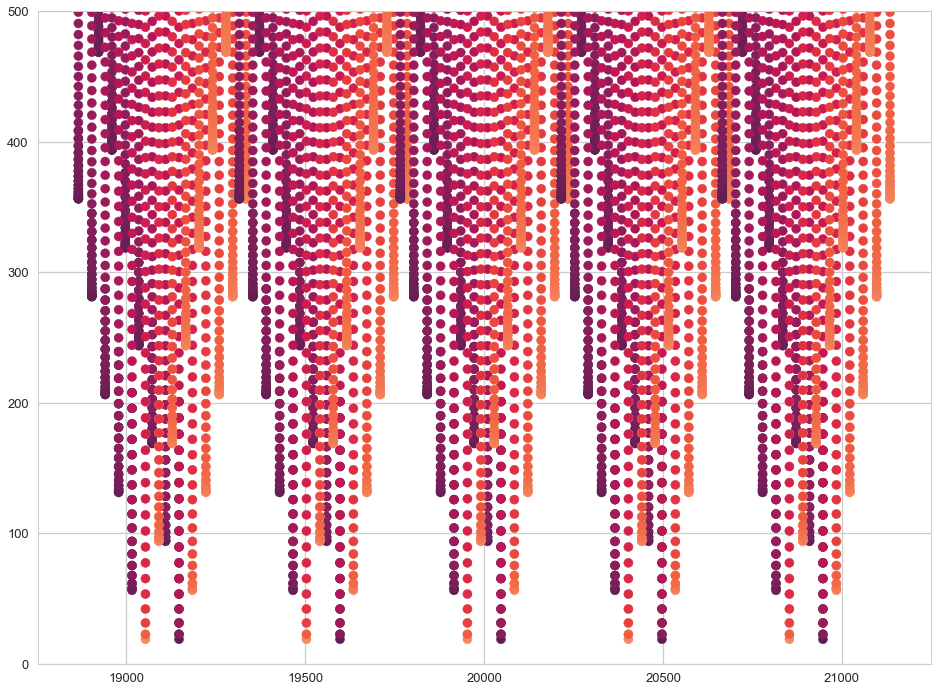

In [17]:
#plt.set_palette("coolwarm")
plt.figure(figsize=(16, 12))
plt.scatter(df_dual_wide_ontop_raw.MidPtX, df_dual_wide_ontop_raw.Offset, c=df_dual_wide_ontop_raw.AzSrc)
plt.ylim(0, 500)

(-500, 500)

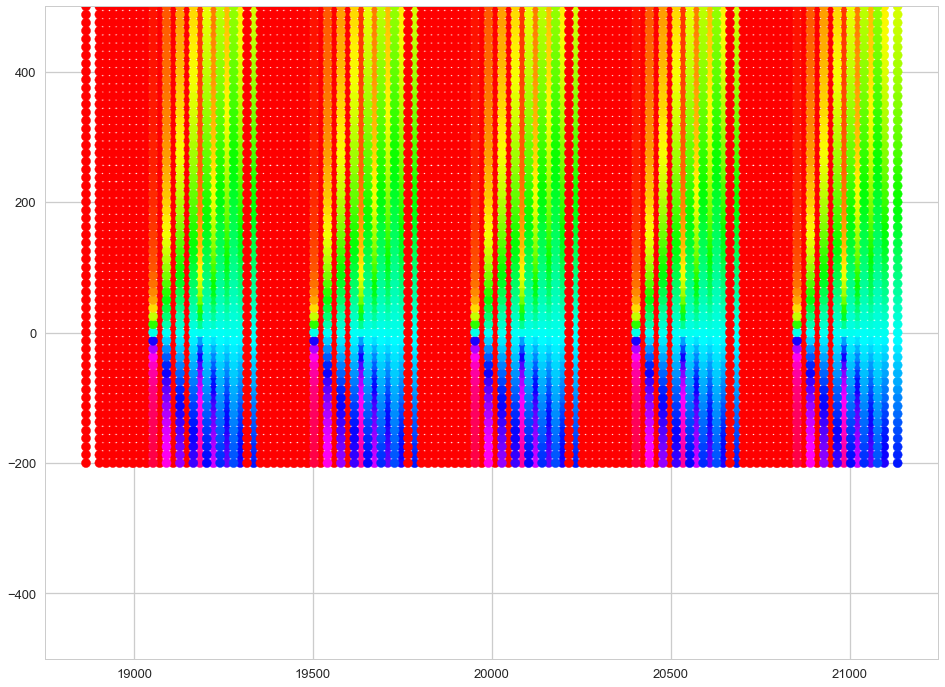

In [18]:
#plt.get_cmap(name='hsv', lut=None)
plt.figure(figsize=(16, 12))
plt.scatter(df_dual_wide_ontop_raw.MidPtX, df_dual_wide_ontop_raw.OffsetY, c=cm.hsv(df_dual_wide_ontop_raw.AzSrc/180))
plt.ylim(-500, 500)

In [19]:
offset_min_0 = 0
offset_min_1 = 20
offset_min_2 = 50
offset_min_3 = 100
offset_min_4 = 200

(0, 250)

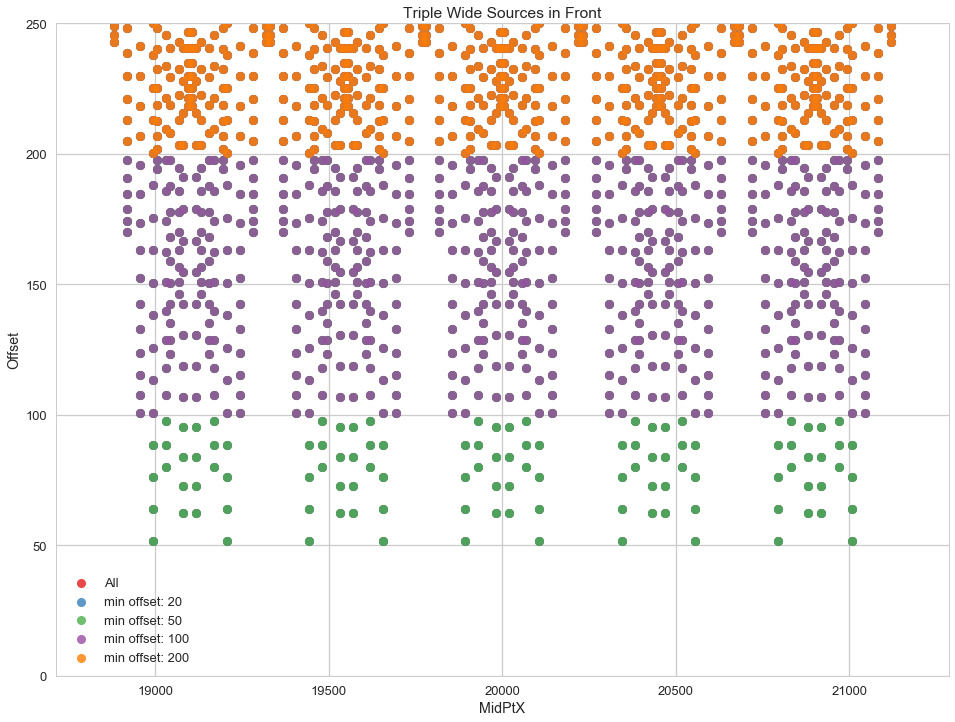

In [20]:
plt.figure(figsize=(16, 12))
sns.regplot(x=df_triple_wide_infront_raw.MidPtX, y=df_triple_wide_infront_raw.Offset, fit_reg=False, label='All')
sns.regplot(x=df_triple_wide_infront_raw[(df_triple_wide_infront_raw['Offset'] > offset_min_1)]['MidPtX'], y=df_triple_wide_infront_raw[(df_triple_wide_infront_raw['Offset'] > offset_min_1)]['Offset'], fit_reg=False, label='min offset: '+str(offset_min_1))
sns.regplot(x=df_triple_wide_infront_raw[(df_triple_wide_infront_raw['Offset'] > offset_min_2)]['MidPtX'], y=df_triple_wide_infront_raw[(df_triple_wide_infront_raw['Offset'] > offset_min_2)]['Offset'], fit_reg=False, label='min offset: '+str(offset_min_2))
sns.regplot(x=df_triple_wide_infront_raw[(df_triple_wide_infront_raw['Offset'] > offset_min_3)]['MidPtX'], y=df_triple_wide_infront_raw[(df_triple_wide_infront_raw['Offset'] > offset_min_3)]['Offset'], fit_reg=False, label='min offset: '+str(offset_min_3))
sns.regplot(x=df_triple_wide_infront_raw[(df_triple_wide_infront_raw['Offset'] > offset_min_4)]['MidPtX'], y=df_triple_wide_infront_raw[(df_triple_wide_infront_raw['Offset'] > offset_min_4)]['Offset'], fit_reg=False, label='min offset: '+str(offset_min_4))
plt.legend()
plt.title('Triple Wide Sources in Front')
plt.ylim(0, 250)

(0, 250)

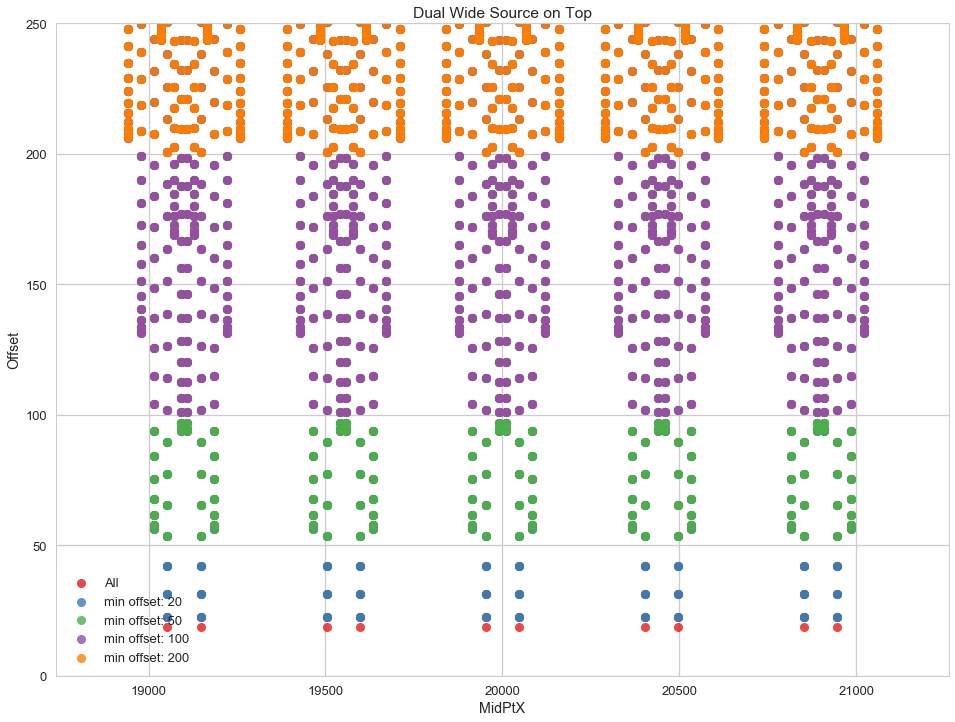

In [21]:
plt.figure(figsize=(16, 12))
sns.regplot(x=df_dual_wide_ontop_raw.MidPtX, y=df_dual_wide_ontop_raw.Offset, fit_reg=False, label='All')
sns.regplot(x=df_dual_wide_ontop_raw[(df_dual_wide_ontop_raw['Offset'] > offset_min_1)]['MidPtX'], y=df_dual_wide_ontop_raw[(df_dual_wide_ontop_raw['Offset'] > offset_min_1)]['Offset'], fit_reg=False, label='min offset: '+str(offset_min_1))
sns.regplot(x=df_dual_wide_ontop_raw[(df_dual_wide_ontop_raw['Offset'] > offset_min_2)]['MidPtX'], y=df_dual_wide_ontop_raw[(df_dual_wide_ontop_raw['Offset'] > offset_min_2)]['Offset'], fit_reg=False, label='min offset: '+str(offset_min_2))
sns.regplot(x=df_dual_wide_ontop_raw[(df_dual_wide_ontop_raw['Offset'] > offset_min_3)]['MidPtX'], y=df_dual_wide_ontop_raw[(df_dual_wide_ontop_raw['Offset'] > offset_min_3)]['Offset'], fit_reg=False, label='min offset: '+str(offset_min_3))
sns.regplot(x=df_dual_wide_ontop_raw[(df_dual_wide_ontop_raw['Offset'] > offset_min_4)]['MidPtX'], y=df_dual_wide_ontop_raw[(df_dual_wide_ontop_raw['Offset'] > offset_min_4)]['Offset'], fit_reg=False, label='min offset: '+str(offset_min_4))
plt.legend()
plt.title('Dual Wide Source on Top')
plt.ylim(0, 250)

(0, 200)

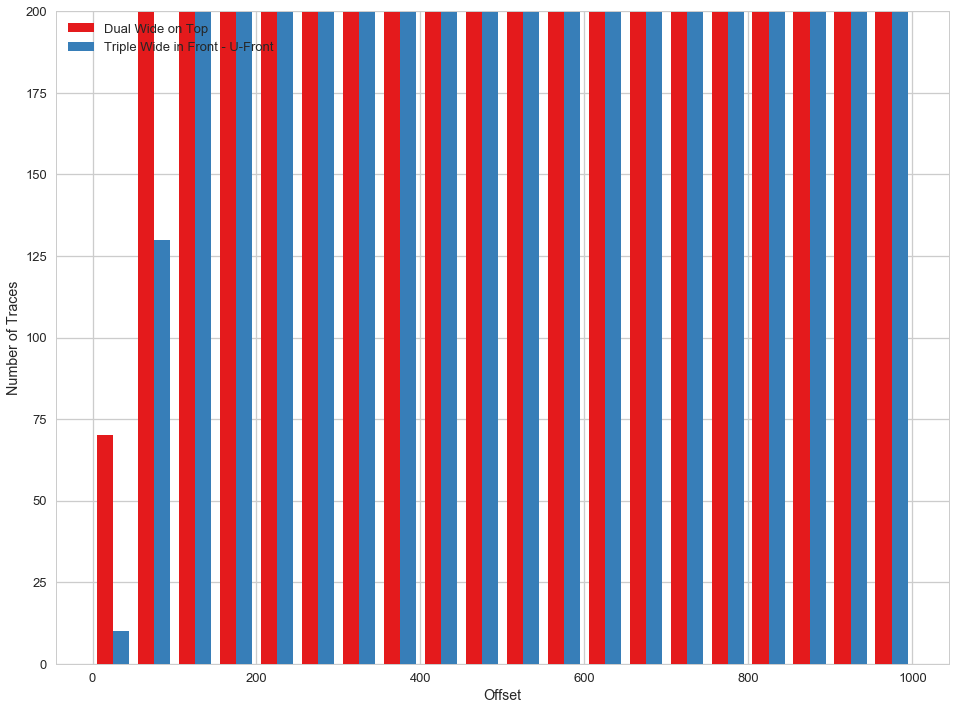

In [22]:
plt.figure(figsize=(16, 12))
plt.hist([df_dual_wide_ontop_raw.Offset, df_triple_wide_infront_U_raw.Offset], bins=20, range=(0, 1000), label=('Dual Wide on Top', 'Triple Wide in Front - U-Front'))
#plt.hist(df_triple_wide_infront_raw.Offset, bins=10, range=(0, 500), alpha=0.6)
plt.legend()
plt.ylabel('Number of Traces')
plt.xlabel('Offset')

#sns.regplot(x=df_triple_wide_infront_raw[(df_triple_wide_infront_raw['Offset'] > offset_min_1)]['MidPtX'], y=df_triple_wide_infront_raw[(df_triple_wide_infront_raw['Offset'] > offset_min_1)]['Offset'], fit_reg=False)
#sns.regplot(x=df_triple_wide_infront_raw[(df_triple_wide_infront_raw['Offset'] > offset_min_2)]['MidPtX'], y=df_triple_wide_infront_raw[(df_triple_wide_infront_raw['Offset'] > offset_min_2)]['Offset'], fit_reg=False)
#sns.regplot(x=df_triple_wide_infront_raw[(df_triple_wide_infront_raw['Offset'] > offset_min_3)]['MidPtX'], y=df_triple_wide_infront_raw[(df_triple_wide_infront_raw['Offset'] > offset_min_3)]['Offset'], fit_reg=False)
#sns.regplot(x=df_triple_wide_infront_raw[(df_triple_wide_infront_raw['Offset'] > offset_min_4)]['MidPtX'], y=df_triple_wide_infront_raw[(df_triple_wide_infront_raw['Offset'] > offset_min_4)]['Offset'], fit_reg=False)
#plt.ylim(0, 500)
plt.ylim(0, 200)

(0, 200)

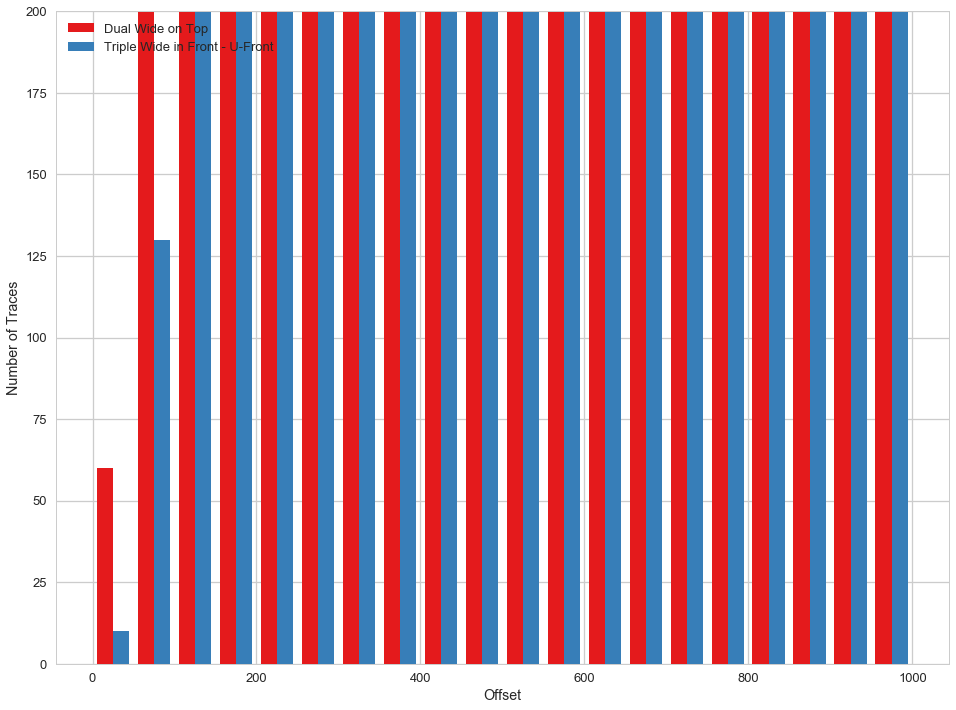

In [23]:
plt.figure(figsize=(16, 12))
plt.hist([df_dual_wide_ontop_raw[(df_dual_wide_ontop_raw['Offset'] > offset_min_1)]['Offset'], df_triple_wide_infront_U_raw[(df_triple_wide_infront_U_raw['Offset'] > offset_min_0)]['Offset'] ], bins=20, range=(0, 1000), cumulative=False, label=('Dual Wide on Top', 'Triple Wide in Front - U-Front'))
plt.legend()
plt.ylabel('Number of Traces')
plt.xlabel('Offset')
plt.ylim(0, 200)

(0, 200)

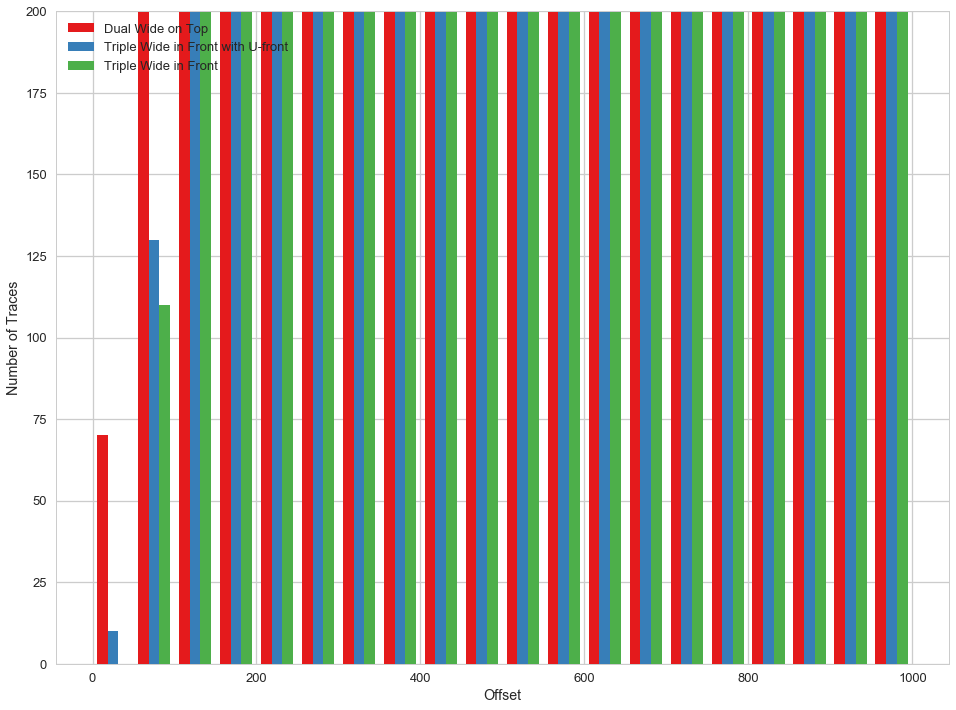

In [24]:
plt.figure(figsize=(16, 12))
plt.hist([df_dual_wide_ontop_raw.Offset, df_triple_wide_infront_U_raw.Offset, df_triple_wide_infront_raw.Offset], bins=20, range=(0, 1000), label=('Dual Wide on Top', 'Triple Wide in Front with U-front', 'Triple Wide in Front'), cumulative=False)
#plt.hist(df_triple_wide_infront_raw.Offset, bins=10, range=(0, 500), alpha=0.6)
plt.legend()
plt.ylabel('Number of Traces')
plt.xlabel('Offset')
plt.ylim(0, 200)

(-250, 250)

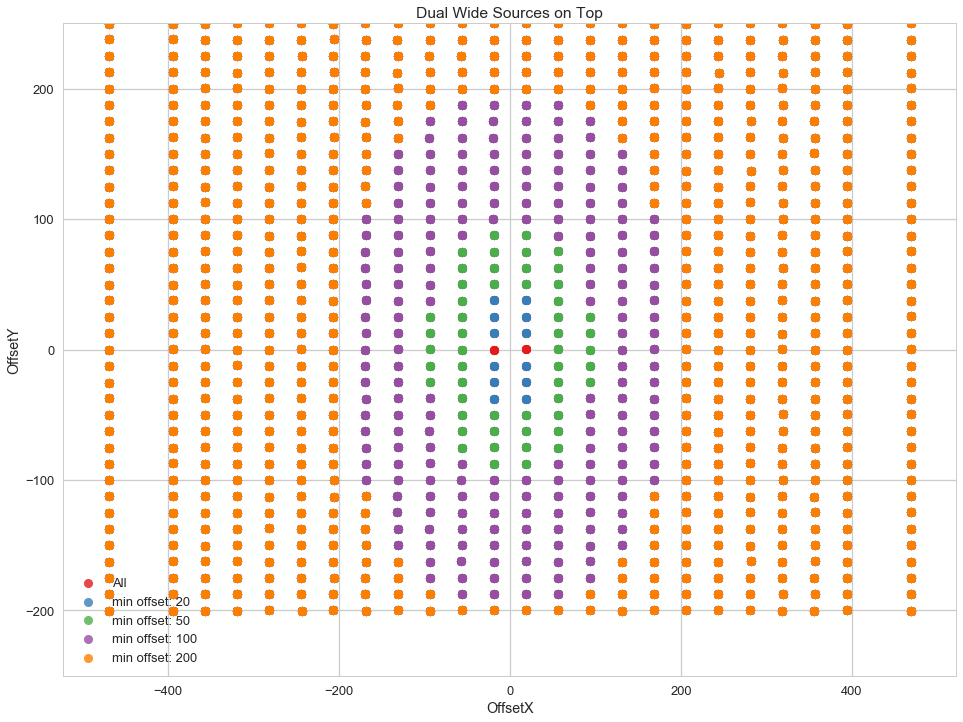

In [25]:
plt.figure(figsize=(16, 12))
sns.regplot(x=df_dual_wide_ontop_raw.OffsetX, y=df_dual_wide_ontop_raw.OffsetY, fit_reg=False, label='All')
sns.regplot(x=df_dual_wide_ontop_raw[(df_dual_wide_ontop_raw['Offset'] > offset_min_1)]['OffsetX'], y=df_dual_wide_ontop_raw[(df_dual_wide_ontop_raw['Offset'] > offset_min_1)]['OffsetY'], fit_reg=False, label='min offset: '+str(offset_min_1))
sns.regplot(x=df_dual_wide_ontop_raw[(df_dual_wide_ontop_raw['Offset'] > offset_min_2)]['OffsetX'], y=df_dual_wide_ontop_raw[(df_dual_wide_ontop_raw['Offset'] > offset_min_2)]['OffsetY'], fit_reg=False, label='min offset: '+str(offset_min_2))
sns.regplot(x=df_dual_wide_ontop_raw[(df_dual_wide_ontop_raw['Offset'] > offset_min_3)]['OffsetX'], y=df_dual_wide_ontop_raw[(df_dual_wide_ontop_raw['Offset'] > offset_min_3)]['OffsetY'], fit_reg=False, label='min offset: '+str(offset_min_3))
sns.regplot(x=df_dual_wide_ontop_raw[(df_dual_wide_ontop_raw['Offset'] > offset_min_4)]['OffsetX'], y=df_dual_wide_ontop_raw[(df_dual_wide_ontop_raw['Offset'] > offset_min_4)]['OffsetY'], fit_reg=False, label='min offset: '+str(offset_min_4))
plt.legend()
plt.title('Dual Wide Sources on Top')
plt.ylim(-250, 250)

(-250, 250)

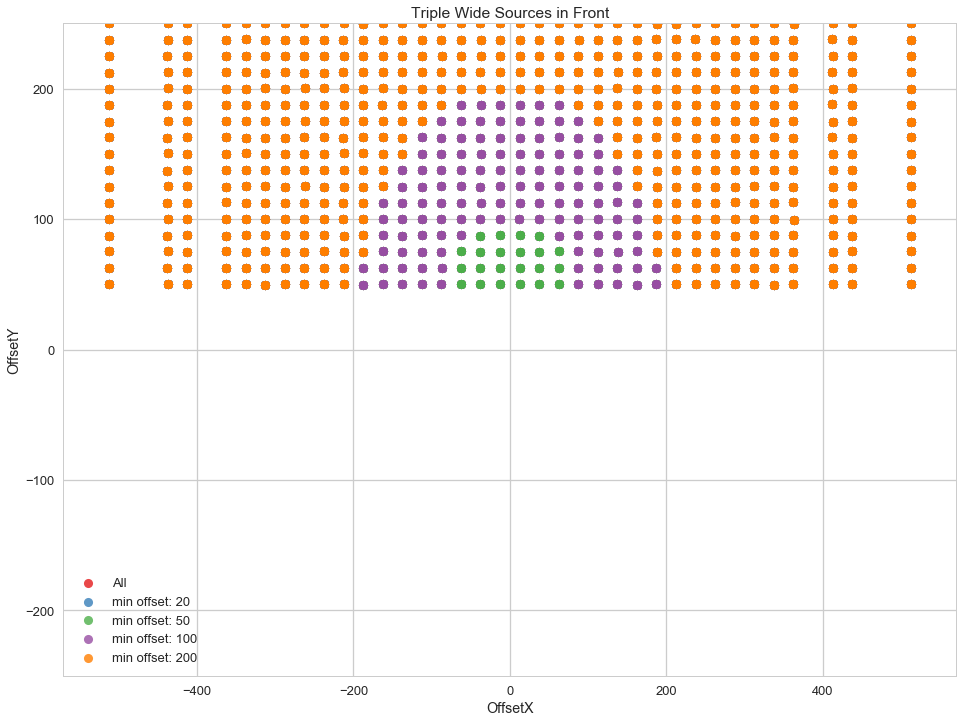

In [26]:
plt.figure(figsize=(16, 12))
sns.regplot(x=df_triple_wide_infront_raw.OffsetX, y=df_triple_wide_infront_raw.OffsetY, fit_reg=False, label='All')
sns.regplot(x=df_triple_wide_infront_raw[(df_triple_wide_infront_raw['Offset'] > offset_min_1)]['OffsetX'], y=df_triple_wide_infront_raw[(df_triple_wide_infront_raw['Offset'] > offset_min_1)]['OffsetY'], fit_reg=False, label='min offset: '+str(offset_min_1))
sns.regplot(x=df_triple_wide_infront_raw[(df_triple_wide_infront_raw['Offset'] > offset_min_2)]['OffsetX'], y=df_triple_wide_infront_raw[(df_triple_wide_infront_raw['Offset'] > offset_min_2)]['OffsetY'], fit_reg=False, label='min offset: '+str(offset_min_2))
sns.regplot(x=df_triple_wide_infront_raw[(df_triple_wide_infront_raw['Offset'] > offset_min_3)]['OffsetX'], y=df_triple_wide_infront_raw[(df_triple_wide_infront_raw['Offset'] > offset_min_3)]['OffsetY'], fit_reg=False, label='min offset: '+str(offset_min_3))
sns.regplot(x=df_triple_wide_infront_raw[(df_triple_wide_infront_raw['Offset'] > offset_min_4)]['OffsetX'], y=df_triple_wide_infront_raw[(df_triple_wide_infront_raw['Offset'] > offset_min_4)]['OffsetY'], fit_reg=False, label='min offset: '+str(offset_min_4))
plt.legend()
plt.title('Triple Wide Sources in Front')
plt.ylim(-250, 250)

In [27]:
#df_triple_wide_infront_raw

(-250, 250)

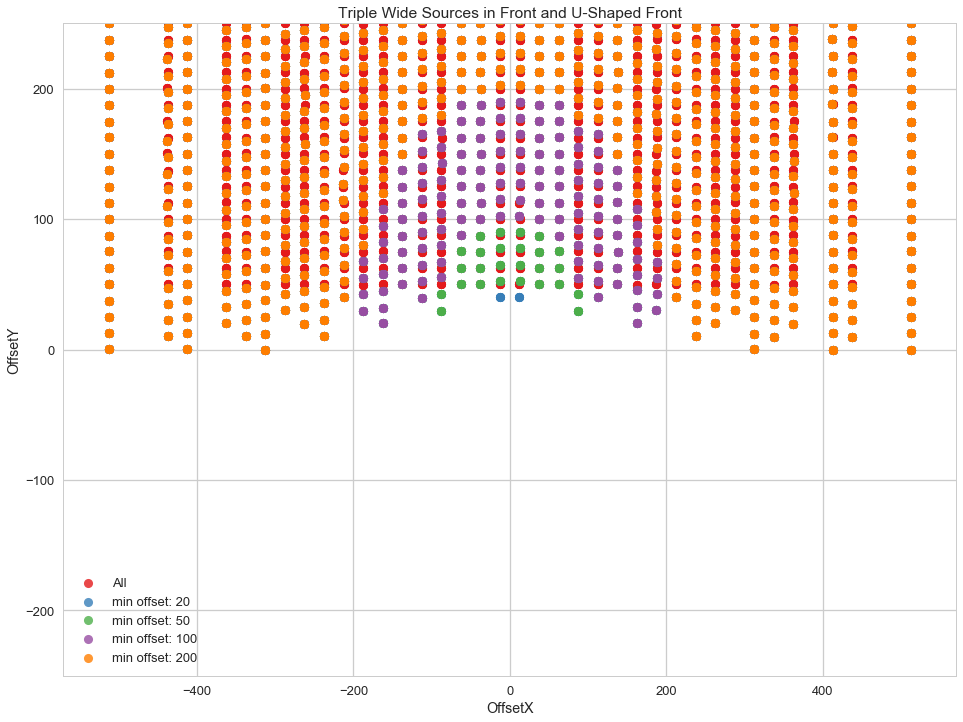

In [28]:
plt.figure(figsize=(16, 12))
sns.regplot(x=df_triple_wide_infront_U_raw.OffsetX, y=df_triple_wide_infront_raw.OffsetY, fit_reg=False, label='All')
sns.regplot(x=df_triple_wide_infront_U_raw[(df_triple_wide_infront_U_raw['Offset'] > offset_min_1)]['OffsetX'], y=df_triple_wide_infront_U_raw[(df_triple_wide_infront_U_raw['Offset'] > offset_min_1)]['OffsetY'], fit_reg=False, label='min offset: '+str(offset_min_1))
sns.regplot(x=df_triple_wide_infront_U_raw[(df_triple_wide_infront_U_raw['Offset'] > offset_min_2)]['OffsetX'], y=df_triple_wide_infront_U_raw[(df_triple_wide_infront_U_raw['Offset'] > offset_min_2)]['OffsetY'], fit_reg=False, label='min offset: '+str(offset_min_2))
sns.regplot(x=df_triple_wide_infront_U_raw[(df_triple_wide_infront_U_raw['Offset'] > offset_min_3)]['OffsetX'], y=df_triple_wide_infront_U_raw[(df_triple_wide_infront_U_raw['Offset'] > offset_min_3)]['OffsetY'], fit_reg=False, label='min offset: '+str(offset_min_3))
sns.regplot(x=df_triple_wide_infront_U_raw[(df_triple_wide_infront_U_raw['Offset'] > offset_min_4)]['OffsetX'], y=df_triple_wide_infront_U_raw[(df_triple_wide_infront_U_raw['Offset'] > offset_min_4)]['OffsetY'], fit_reg=False, label='min offset: '+str(offset_min_4))
plt.legend()
plt.title('Triple Wide Sources in Front and U-Shaped Front')
plt.ylim(-250, 250)

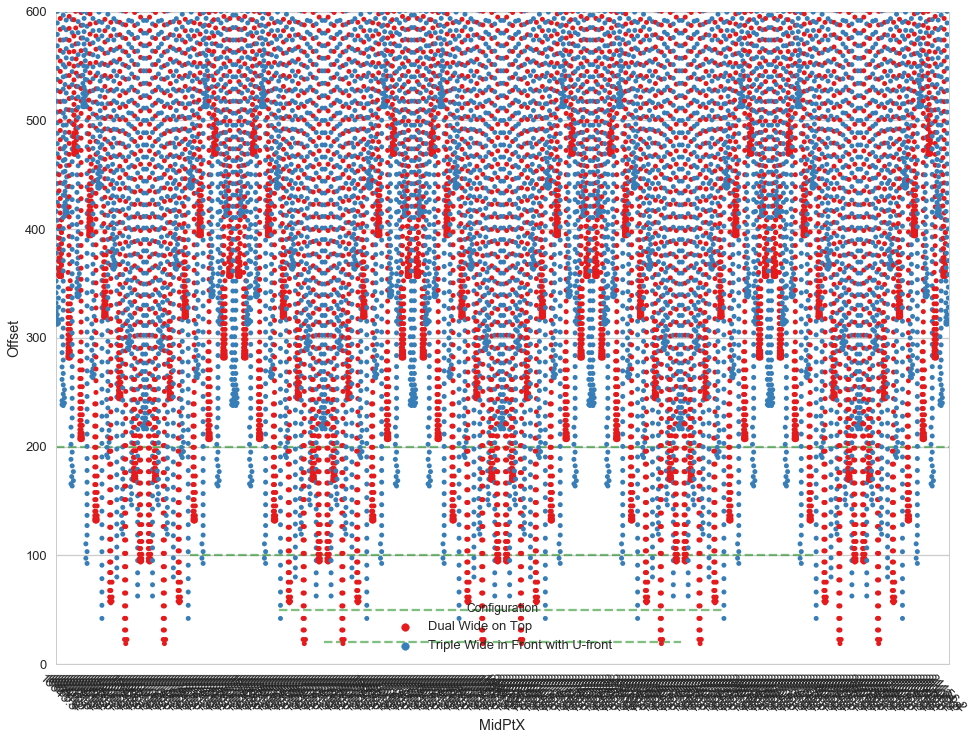

In [29]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 12))
sns.swarmplot(x='MidPtX', y='Offset', data=df_combined[(df_combined['Offset'] <= 1000) & (df_combined['Offset'] > offset_min_0) & (df_combined['Configuration'] != 'Triple Wide in Front')], hue='Configuration')
plt.ylim(0, 600)
plt.axhline(20, color='green', xmin=0.30, xmax=0.70, alpha=0.5, linestyle='--')
plt.axhline(50, color='green', xmin=0.25, xmax=0.75, alpha=0.5, linestyle='--')
plt.axhline(100, color='green', xmin=0.15, xmax=0.85, alpha=0.5, linestyle='--')
plt.axhline(200, color='green', xmin=0, xmax=1, alpha=0.5, linestyle='--')
plt.xticks(rotation=-45);

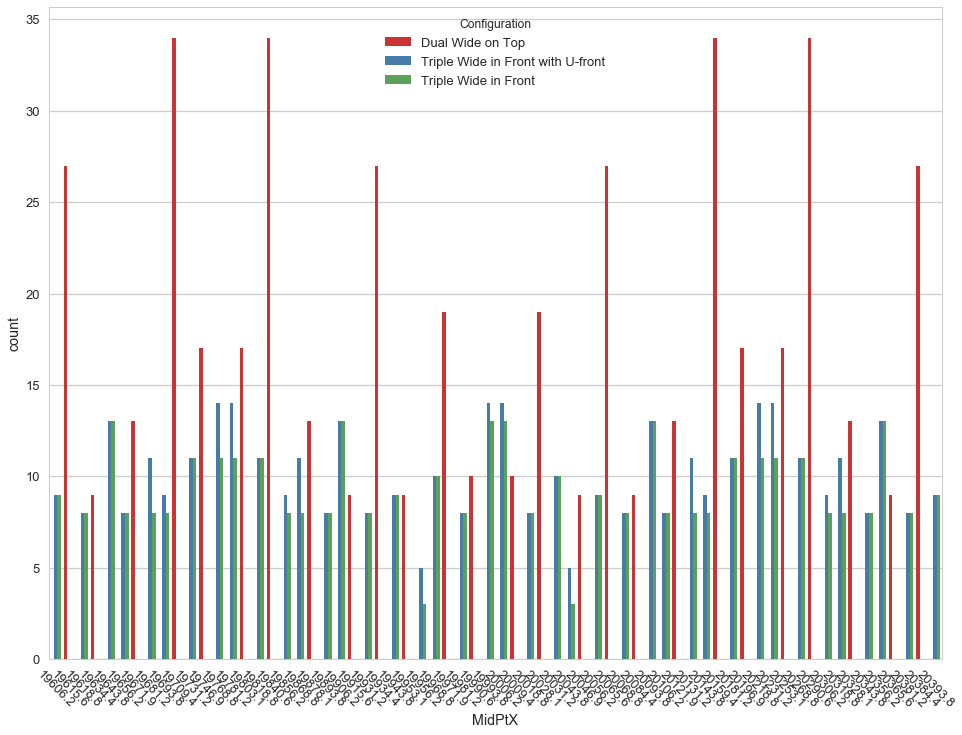

In [30]:
plt.figure(figsize=(16, 12))
sns.countplot(x='MidPtX', data=df_combined[(df_combined['Offset'] <= 300) & (df_combined['Offset'] > 200) & (df_combined['MidPtX'] >= 19600) & (df_combined['MidPtX'] <= 20400)], hue='Configuration')
#sns.countplot(x='MidPtX', data=df_combined, hue='Configuration')
plt.xticks(rotation=-45);

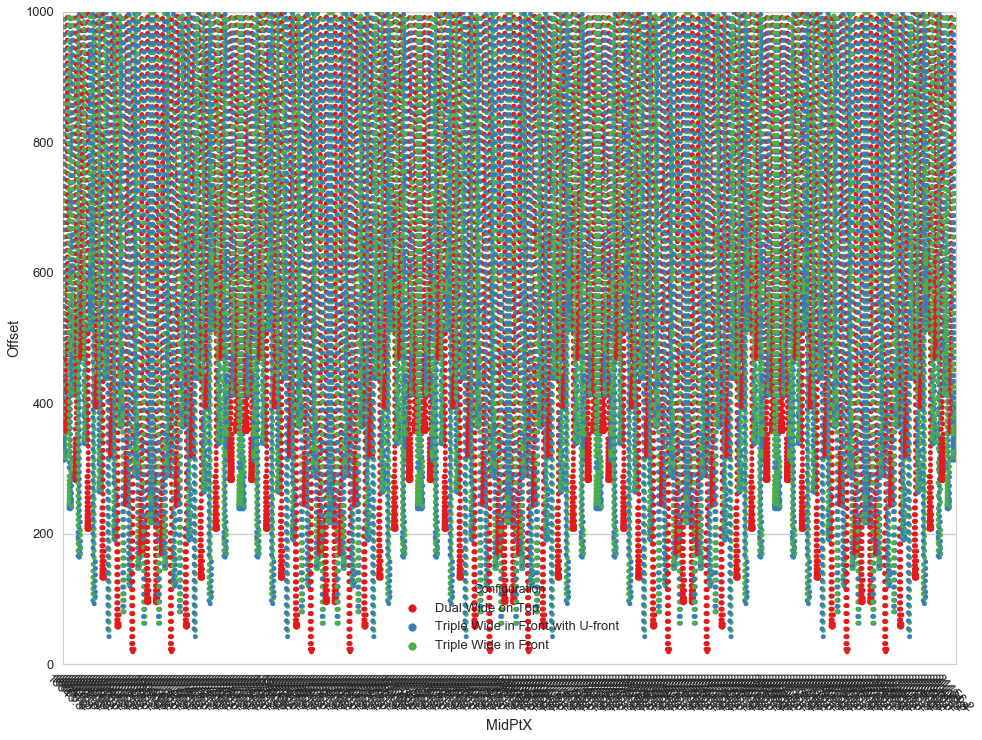

In [31]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 12))
sns.swarmplot(x='MidPtX', y='Offset', data=df_combined[(df_combined['Offset'] <= 1000) & (df_combined['Offset'] > offset_min_0)], hue='Configuration')
plt.ylim(0, 1000)
plt.xticks(rotation=-45);

In [32]:
df_combined_dual_reduced = df_combined[(df_combined['Offset'] <= 100) & (df_combined['Offset'] > 0) & (df_combined['Configuration'] == 'Dual Wide on Top')]

In [33]:
triple_offset_1 = df_triple_wide_infront_raw[(df_triple_wide_infront_raw['Offset'] <= 100) & (df_triple_wide_infront_raw['Offset'] > 0)]['MidPtX'].tolist()
triple_offset_2 = df_triple_wide_infront_raw[(df_triple_wide_infront_raw['Offset'] <= 200) & (df_triple_wide_infront_raw['Offset'] > 100)]['MidPtX'].tolist()

In [34]:
dual_offset_1 = df_dual_wide_ontop_raw[(df_dual_wide_ontop_raw['Offset'] <= 100) & (df_dual_wide_ontop_raw['Offset'] > 0)]['MidPtX'].tolist()
dual_offset_2 = df_dual_wide_ontop_raw[(df_dual_wide_ontop_raw['Offset'] <= 200) & (df_dual_wide_ontop_raw['Offset'] > 100)]['MidPtX'].tolist()

In [35]:
#triple_offset_1

In [36]:
def maxgap(list):
    maxdifference = 0
    for i in range(1, len(list)):
        difference = abs(list[i] - list[i-1])
        print(list[i], list[i-1], difference)
        if (difference > maxdifference):
            maxdifference = difference
    return maxdifference

In [37]:
#print(maxgap(dual_offset_2))

In [38]:
#print(maxgap(triple_offset_1))

In [39]:
#print(maxgap(triple_offset_2))

In [40]:
#print(maxgap(dual_offset_1))

In [41]:
#gap_dual

In [42]:
#cols = ['Offsetclass', 'MaxGap']
#gap_dual = pd.DataFrame(columns=cols)
#for n in range(1,5):
#    print(n)
#gap_dual_temp = pd.DataFrame([[n, maxgap(dual_offset_1)]], columns=cols)
#gap_dual.append(gap_dual_temp, ignore_index=True)
#gap_dual.append(gap_dual_temp, ignore_index=True)

In [43]:
#gap_dual_temp

In [44]:
df_dual_limit = df_dual_wide_ontop_raw[(df_dual_wide_ontop_raw['Offset'] <= 600)]
df_triple_limit = df_triple_wide_infront_raw[(df_triple_wide_infront_raw['Offset'] <= 600)]
df_triple_U_limit = df_triple_wide_infront_U_raw[(df_triple_wide_infront_U_raw['Offset'] <= 600)]

In [45]:
offset_breaks = range(0, 625, 25)

In [46]:
offset_breaks[-1]

600

In [47]:
offset_planes = pd.IntervalIndex.from_breaks(offset_breaks)

In [48]:
offset_planes

IntervalIndex([(0, 25], (25, 50], (50, 75], (75, 100], (100, 125] ... (475, 500], (500, 525], (525, 550], (550, 575], (575, 600]]
              closed='right',
              dtype='interval[int64]')

In [49]:
pd.cut(df_dual_limit['Offset'], offset_planes)

0        (400, 425]
1        (400, 425]
2        (375, 400]
3        (375, 400]
4        (375, 400]
5        (375, 400]
6        (375, 400]
7        (350, 375]
8        (350, 375]
9        (350, 375]
10       (350, 375]
11       (350, 375]
12       (350, 375]
13       (350, 375]
14       (350, 375]
15       (350, 375]
16       (350, 375]
17       (350, 375]
18       (350, 375]
19       (350, 375]
20       (350, 375]
21       (350, 375]
22       (350, 375]
23       (350, 375]
24       (350, 375]
25       (350, 375]
26       (375, 400]
27       (375, 400]
28       (375, 400]
29       (375, 400]
            ...    
76423    (350, 375]
76424    (375, 400]
76425    (375, 400]
76426    (375, 400]
76427    (375, 400]
76428    (375, 400]
76429    (400, 425]
76430    (400, 425]
76431    (400, 425]
76432    (400, 425]
76433    (425, 450]
76434    (425, 450]
76435    (425, 450]
76436    (450, 475]
76437    (450, 475]
76438    (450, 475]
76439    (450, 475]
76440    (475, 500]
76441    (475, 500]


In [50]:
df_dual_limit['Offsetclass'] = pd.cut(df_dual_limit['Offset'], offset_planes)
df_triple_limit['Offsetclass'] = pd.cut(df_triple_limit['Offset'], offset_planes)
df_triple_U_limit['Offsetclass'] = pd.cut(df_triple_U_limit['Offset'], offset_planes)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [51]:
df_dual_limit

ShotNo  StrNo  RecNo   Offset   MidPtX   MidPtY   DipSrc   DipRec  \
0           1      1      1  408.551  19334.4  19650.0  11.6295  168.370   
1           1      1      2  402.580  19334.4  19643.8  11.4646  168.535   
2           1      1      3  396.912  19334.4  19637.5  11.3054  168.695   
3           1      1      4  391.561  19334.4  19631.2  11.1579  168.842   
4           1      1      5  386.541  19334.4  19625.0  11.0176  168.982   
5           1      1      6  381.864  19334.4  19618.8  10.8876  169.112   
6           1      1      7  377.543  19334.4  19612.5  10.7674  169.233   
7           1      1      8  373.591  19334.4  19606.2  10.6573  169.343   
8           1      1      9  370.019  19334.4  19600.0  10.5574  169.443   
9           1      1     10  366.838  19334.4  19593.8  10.4706  169.529   
10          1      1     11  364.059  19334.4  19587.5  10.3917  169.608   
11          1      1     12  361.691  19334.4  19581.2  10.3265  169.674   
12          1      1     13  359.742  19334.4  19575.0  10.2735  169.726   
13          1      1     14  358.218  19334.4  19568.8  10.2292  169.771   
14          1      1     15  357.126  19334.4  19562.5  10.1999  169.800   
15          1      1     16  356.469  19334.4  19556.2  10.1826  169.817   
16          1      1     17  356.250  19334.4  19550.0  10.1746  169.825   
17          1      1     18  356.469  19334.4  19543.8  10.1816  169.818   
18          1      1     19  357.126  19334.4  19537.5  10.2009  169.799   
19          1      1     20  358.218  19334.4  19531.2  10.2292  169.771   
20          1      1     21  359.742  19334.4  19525.0  10.2725  169.727   
21          1      1     22  361.691  19334.4  19518.8  10.3276  169.672   
22          1      1     23  364.059  19334.4  19512.5  10.3914  169.609   
23          1      1     24  366.838  19334.4  19506.2  10.4700  169.530   
24          1      1     25  370.019  19334.4  19500.0  10.5585  169.441   
25          1      1     26  373.591  19334.4  19493.8  10.6571  169.343   
26          1      1     27  377.543  19334.4  19487.5  10.7678  169.232   
27          1      1     28  381.864  19334.4  19481.2  10.8874  169.113   
28          1      1     29  386.541  19334.4  19475.0  11.0169  168.983   
29          1      1     30  391.561  19334.4  19468.8  11.1567  168.843   
...       ...    ...    ...      ...      ...      ...      ...      ...   
76423       2     12     26  373.591  20665.6  19506.2  10.6573  169.343   
76424       2     12     27  377.543  20665.6  19500.0  10.7674  169.233   
76425       2     12     28  381.864  20665.6  19493.8  10.8876  169.112   
76426       2     12     29  386.541  20665.6  19487.5  11.0176  168.982   
76427       2     12     30  391.561  20665.6  19481.2  11.1579  168.842   
76428       2     12     31  396.912  20665.6  19475.0  11.3054  168.695   
76429       2     12     32  402.580  20665.6  19468.8  11.4646  168.535   
76430       2     12     33  408.551  20665.6  19462.5  11.6295  168.370   
76431       2     12     34  414.814  20665.6  19456.2  11.8055  168.195   
76432       2     12     35  421.354  20665.6  19450.0  11.9861  168.014   
76433       2     12     36  428.159  20665.6  19443.8  12.1742  167.826   
76434       2     12     37  435.217  20665.6  19437.5  12.3650  167.635   
76435       2     12     38  442.516  20665.6  19431.2  12.5670  167.433   
76436       2     12     39  450.043  20665.6  19425.0  12.7722  167.228   
76437       2     12     40  457.789  20665.6  19418.8  12.9843  167.016   
76438       2     12     41  465.740  20665.6  19412.5  13.2023  166.798   
76439       2     12     42  473.889  20665.6  19406.2  13.4268  166.573   
76440       2     12     43  482.223  20665.6  19400.0  13.6529  166.347   
76441       2     12     44  490.734  20665.6  19393.8  13.8895  166.110   
76442       2     12     45  499.414  20665.6  19387.5  14.1245  165.876   
76443       2     12     46  508.252  20665.6  19381.2 

In [52]:
df_triple_limit

ShotNo  StrNo  RecNo   Offset   MidPtX   MidPtY    DipSrc   DipRec  \
0            1      1      1  316.475  19356.2  19775.0   9.05687  170.943   
1            1      1      2  318.689  19356.2  19768.8   9.11919  170.881   
2            1      1      3  321.374  19356.2  19762.5   9.19565  170.804   
3            1      1      4  324.519  19356.2  19756.2   9.28411  170.716   
4            1      1      5  328.110  19356.2  19750.0   9.38426  170.616   
5            1      1      6  332.133  19356.2  19743.8   9.49867  170.501   
6            1      1      7  336.573  19356.2  19737.5   9.62425  170.376   
7            1      1      8  341.413  19356.2  19731.2   9.75828  170.242   
8            1      1      9  346.636  19356.2  19725.0   9.90791  170.092   
9            1      1     10  352.225  19356.2  19718.8  10.06410  169.936   
10           1      1     11  358.164  19356.2  19712.5  10.22800  169.772   
11           1      1     12  364.434  19356.2  19706.2  10.40380  169.596   
12           1      1     13  371.021  19356.2  19700.0  10.58550  169.414   
13           1      1     14  377.905  19356.2  19693.8  10.77780  169.222   
14           1      1     15  385.073  19356.2  19687.5  10.97710  169.023   
15           1      1     16  392.508  19356.2  19681.2  11.18330  168.817   
16           1      1     17  400.195  19356.2  19675.0  11.39850  168.601   
17           1      1     18  408.121  19356.2  19668.8  11.61670  168.383   
18           1      1     19  416.271  19356.2  19662.5  11.84630  168.154   
19           1      1     20  424.632  19356.2  19656.2  12.07640  167.924   
20           1      1     21  433.193  19356.2  19650.0  12.31080  167.689   
21           1      1     22  441.942  19356.2  19643.8  12.55110  167.449   
22           1      1     23  450.867  19356.2  19637.5  12.79490  167.205   
23           1      1     24  459.959  19356.2  19631.2  13.04360  166.956   
24           1      1     25  469.208  19356.2  19625.0  13.29690  166.703   
25           1      1     26  478.605  19356.2  19618.8  13.55670  166.443   
26           1      1     27  488.141  19356.2  19612.5  13.81640  166.184   
27           1      1     28  497.808  19356.2  19606.2  14.08000  165.920   
28           1      1     29  507.599  19356.2  19600.0  14.34520  165.655   
29           1      1     30  517.506  19356.2  19593.8  14.61050  165.390   
...        ...    ...    ...      ...      ...      ...       ...      ...   
114925       3     12      8  341.413  20643.8  19756.2   9.75971  170.240   
114926       3     12      9  346.636  20643.8  19750.0   9.90819  170.092   
114927       3     12     10  352.225  20643.8  19743.8  10.06210  169.938   
114928       3     12     11  358.164  20643.8  19737.5  10.22950  169.771   
114929       3     12     12  364.434  20643.8  19731.2  10.40270  169.597   
114930       3     12     13  371.021  20643.8  19725.0  10.58570  169.414   
114931       3     12     14  377.905  20643.8  19718.8  10.77720  169.223   
114932       3     12     15  385.073  20643.8  19712.5  10.97660  169.023   
114933       3     12     16  392.508  20643.8  19706.2  11.18290  168.817   
114934       3     12     17  400.195  20643.8  19700.0  11.39770  168.602   
114935       3     12     18  408.121  20643.8  19693.8  11.61850  168.381   
114936       3     12     19  416.271  20643.8  19687.5  11.84480  168.155   
114937       3     12     20  424.632  20643.8  19681.2  12.07790  167.922   
114938       3     12     21  433.193  20643.8  19675.0  12.30950  167.691   
114939       3     12     22  441.942  20643.8  19668.8  12.55110  167.449   
114940       3     12     23  450.867  20643.8  19662.5  12.79430  167.206   
114941       3     12     24  459.959  20643.8  19656.2  13.04430  166.956   
114942       3     12     25  469.208  20643.8  19650.0  13.29700  166.703   
114943       3     12     26  478.605  20643.8  19643.8  13.55600  166.444   
114944       3     12     27  

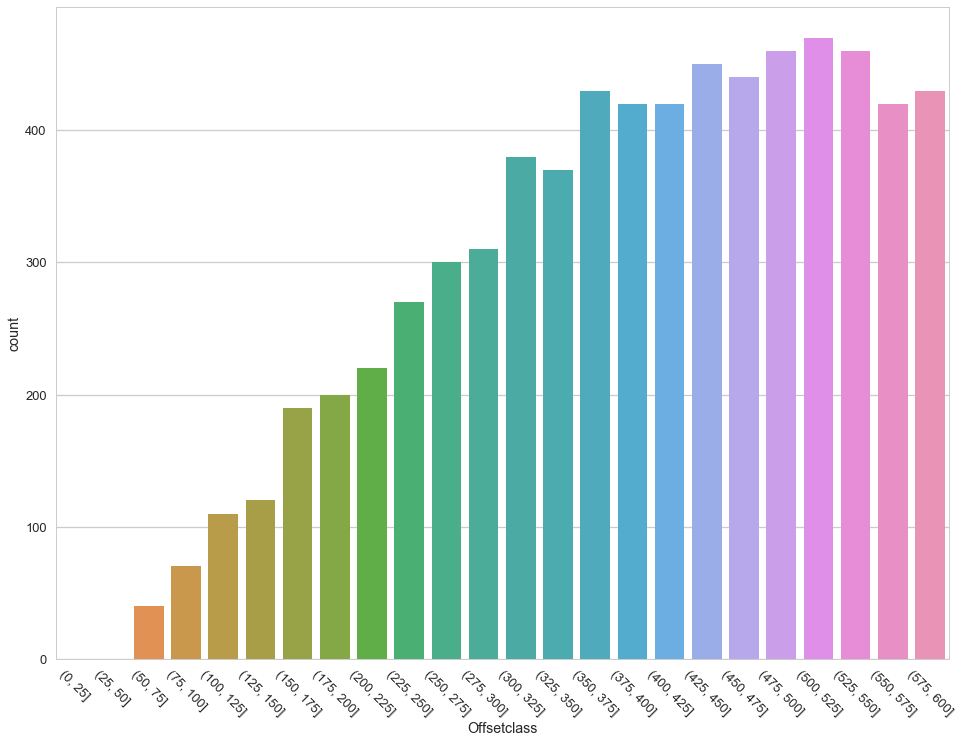

In [53]:
plt.figure(figsize=(16, 12))
sns.countplot(x='Offsetclass', data=df_triple_limit)
plt.xticks(rotation=-45);

In [54]:
df_dual_midptx_offset = df_dual_limit.groupby(['Offsetclass', 'MidPtX']).count().drop(['StrNo', 'RecNo', 'Offset', 'MidPtY', 'DipSrc', 'DipRec', 'AzSrc', 'OffsetY', 'OffsetX', 'Configuration'], axis=1).rename(columns={'ShotNo': 'Count'})

In [55]:
df_triple_midptx_offset = df_triple_limit.groupby(['Offsetclass', 'MidPtX']).count().drop(['StrNo', 'RecNo', 'Offset', 'MidPtY', 'DipSrc', 'DipRec', 'AzSrc', 'OffsetY', 'OffsetX', 'Configuration'], axis=1).rename(columns={'ShotNo': 'Count'})

In [56]:
df_triple_U_midptx_offset = df_triple_U_limit.groupby(['Offsetclass', 'MidPtX']).count().drop(['StrNo', 'RecNo', 'Offset', 'MidPtY', 'DipSrc', 'DipRec', 'AzSrc', 'OffsetY', 'OffsetX', 'Configuration'], axis=1).rename(columns={'ShotNo': 'Count'})

In [57]:
df_dual_offset_count = df_dual_midptx_offset.reset_index()
df_triple_offset_count = df_triple_midptx_offset.reset_index()
df_triple_U_offset_count = df_triple_U_midptx_offset.reset_index()

#df_triple_offset_count = df_triple_midptx_offset.dropna().reset_index()

In [58]:
df_dual_offset_count_pivot = df_dual_offset_count.pivot('Offsetclass', 'MidPtX', 'Count')
df_triple_offset_count_pivot = df_triple_offset_count.pivot('Offsetclass', 'MidPtX', 'Count')
df_triple_U_offset_count_pivot = df_triple_U_offset_count.pivot('Offsetclass', 'MidPtX', 'Count')

In [59]:
df_triple_offset_count_pivot

MidPtX       18843.8  18881.2  18893.8  18918.8  18931.2  18943.8  18956.2  \
Offsetclass                                                                  
(0, 25]          NaN      NaN      NaN      NaN      NaN      NaN      NaN   
(25, 50]         NaN      NaN      NaN      NaN      NaN      NaN      NaN   
(50, 75]         NaN      NaN      NaN      NaN      NaN      NaN      NaN   
(75, 100]        NaN      NaN      NaN      NaN      NaN      NaN      NaN   
(100, 125]       NaN      NaN      NaN      NaN      NaN      NaN      4.0   
(125, 150]       NaN      NaN      NaN      NaN      NaN      NaN      2.0   
(150, 175]       NaN      NaN      NaN      2.0      NaN      NaN      3.0   
(175, 200]       NaN      NaN      NaN      4.0      NaN      NaN      2.0   
(200, 225]       NaN      NaN      NaN      3.0      NaN      NaN      2.0   
(225, 250]       NaN      3.0      NaN      3.0      NaN      NaN      2.0   
(250, 275]       NaN      5.0      NaN      2.0      NaN      NaN      2.0   
(275, 300]       NaN      3.0      NaN      3.0      NaN      NaN      2.0   
(300, 325]       4.0      3.0      NaN      2.0      NaN      NaN      3.0   
(325, 350]       5.0      3.0      NaN      2.0      4.0      NaN      2.0   
(350, 375]       4.0      3.0      NaN      3.0      6.0      NaN      2.0   
(375, 400]       3.0      2.0      NaN      2.0      4.0      NaN      2.0   
(400, 425]       4.0      3.0      5.0      2.0      3.0      NaN      2.0   
(425, 450]       2.0      2.0      6.0      2.0      3.0      NaN      2.0   
(450, 475]       3.0      2.0      4.0      2.0      3.0      NaN      2.0   
(475, 500]       3.0      3.0      4.0      2.0      3.0      NaN      2.0   
(500, 525]       2.0      2.0      3.0      2.0      3.0      6.0      2.0   
(525, 550]       3.0      2.0      4.0      3.0      2.0      6.0      2.0   
(550, 575]       2.0      2.0      3.0      2.0      3.0      5.0      2.0   
(575, 600]       2.0      3.0      2.0      2.0      2.0      4.0      2.0   

MidPtX       18968.8  18981.2  18993.8   ...     21006.2  21018.8  21031.2  \
Offsetclass                              ...                                 
(0, 25]          NaN      NaN      NaN   ...         NaN      NaN      NaN   
(25, 50]         NaN      NaN      NaN   ...         NaN      NaN      NaN   
(50, 75]         NaN      NaN      2.0   ...         2.0      NaN      NaN   
(75, 100]        NaN      NaN      2.0   ...         2.0      NaN      NaN   
(100, 125]       NaN      NaN      2.0   ...         2.0      NaN      NaN   
(125, 150]       NaN      NaN      2.0   ...         2.0      NaN      NaN   
(150, 175]       NaN      NaN      2.0   ...         2.0      NaN      NaN   
(175, 200]       NaN      NaN      2.0   ...         2.0      NaN      NaN   
(200, 225]       NaN      NaN      2.0   ...         2.0      NaN      NaN   
(225, 250]       NaN      NaN      2.0   ...         2.0      NaN      NaN   
(250, 275]       3.0      NaN      2.0   ...         2.0      NaN      3.0   
(275, 300]       5.0      NaN      2.0   ...         2.0      NaN      5.0   
(300, 325]       4.0      NaN      2.0   ...         2.0      NaN      4.0   
(325, 350]       3.0      NaN      2.0   ...         2.0      NaN      3.0   
(350, 375]       3.0      NaN      2.0   ...         2.0      NaN      3.0   
(375, 400]       3.0      NaN      2.0   ...         2.0      NaN      3.0   
(400, 425]       2.0      NaN      2.0   ...         2.0      NaN      2.0   
(425, 450]       3.0      5.0      2.0   ...         2.0      5.0      3.0   
(450, 475]       2.0      6.0      2.0   ...         2.0      6.0      2.0   
(475, 500]       3.0      5.0      2.0   ...         2.0      5.0      3.0   
(500, 525]       2.0      4.0      2.0   ...         2.0      4.0      2.0   
(525, 550]       2.0      3.0      2.0   ...         2.0      3.0      2.0   
(550, 575]       2.0      3.0      2.0   ...         2.0      3.0      2.0   
(575, 600]       3.0 

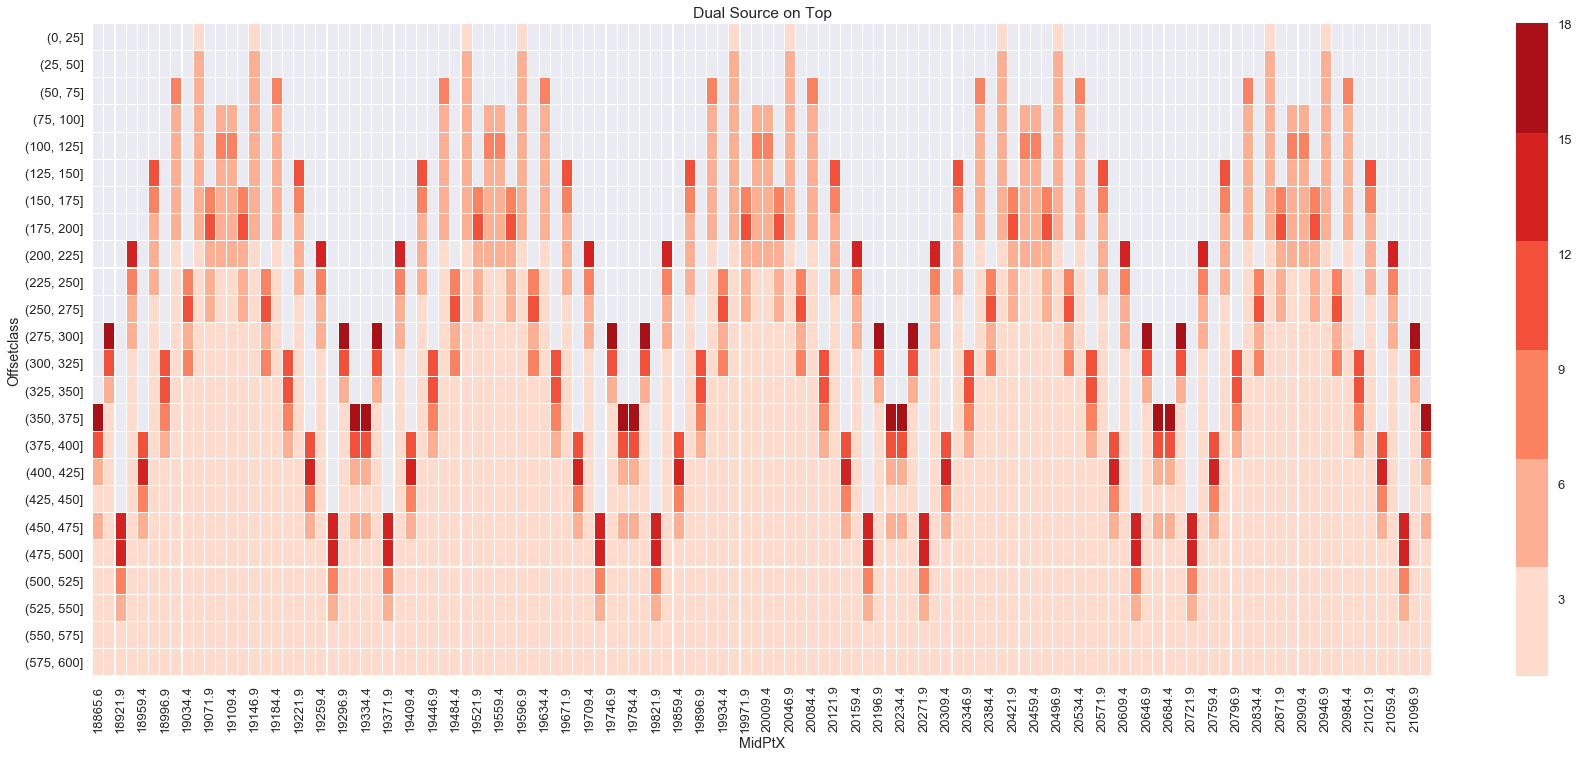

In [60]:
plt.figure(figsize=(30, 12))
sns.set_style('dark')
pal = sns.color_palette('Reds')
sns.heatmap(df_dual_offset_count_pivot, cmap=pal, vmin=1, vmax=18, linewidths=0.1)
plt.title('Dual Source on Top');

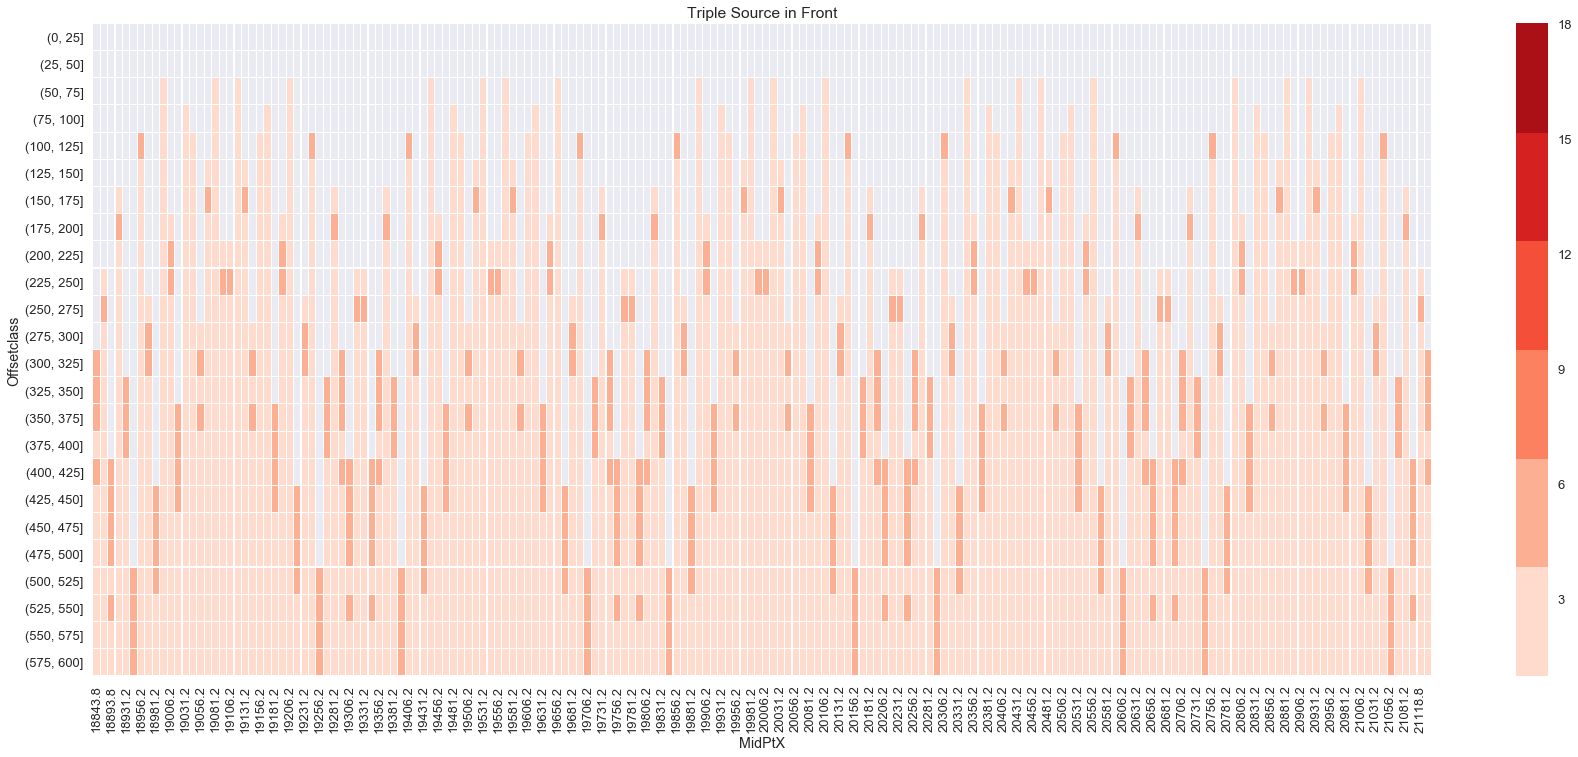

In [61]:
plt.figure(figsize=(30, 12))
pal = sns.color_palette('Reds')
sns.heatmap(df_triple_offset_count_pivot, cmap=pal, vmin=1, vmax=18, linewidths=0.1)
plt.title('Triple Source in Front');

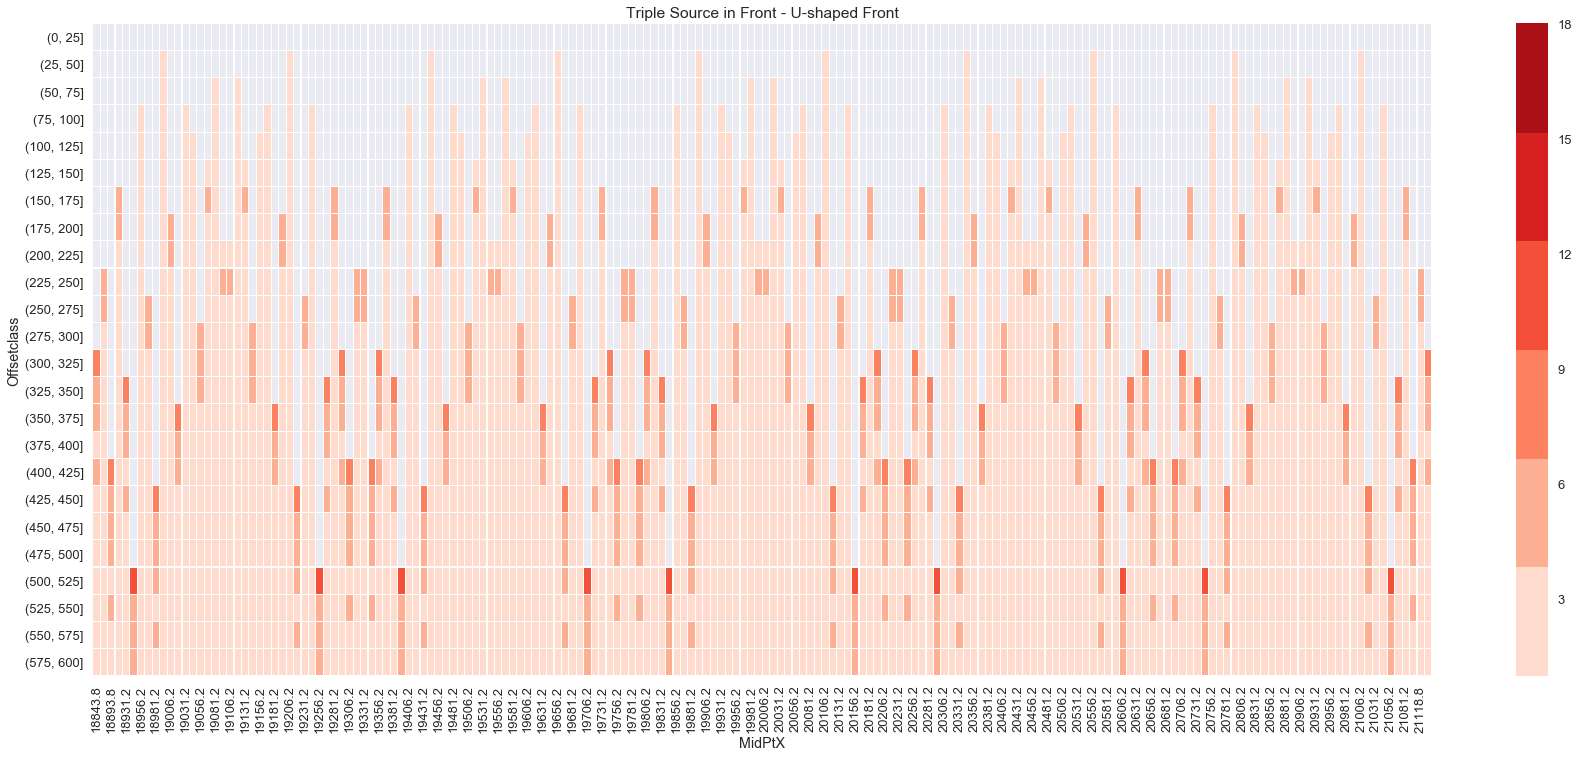

In [62]:
plt.figure(figsize=(30, 12))
pal = sns.color_palette('Reds')
sns.heatmap(df_triple_U_offset_count_pivot, cmap=pal, vmin=1, vmax=18, linewidth=0.1)
plt.title('Triple Source in Front - U-shaped Front');

In [63]:
pd.isnull(df_triple_offset_count_pivot).apply(np.sum, axis=1)

Offsetclass
(0, 25]       180
(25, 50]      180
(50, 75]      160
(75, 100]     150
(100, 125]    130
(125, 150]    120
(150, 175]    110
(175, 200]    100
(200, 225]     90
(225, 250]     80
(250, 275]     70
(275, 300]     60
(300, 325]     50
(325, 350]     40
(350, 375]     30
(375, 400]     30
(400, 425]     20
(425, 450]     10
(450, 475]     10
(475, 500]     10
(500, 525]      0
(525, 550]      0
(550, 575]      0
(575, 600]      0
dtype: int64

In [64]:
def getMaxLength(arr): 
  
    # intitialize count 
    count = 0 
      
    # initialize max 
    result = 0 
  
    for i in range(0, len(arr)): 
      
        # Reset count when True is found 
        if arr[i]: 
            count = 0
  
        # If False is found, increment count 
        # and update result if count  
        # becomes more. 
        else: 
              
            # increase count 
            count+= 1 
            result = max(result, count)  
          
    return result  

In [65]:
getMaxLength([True, True, False, True, False])

1

In [66]:
count_dual_offset = pd.notnull(df_dual_offset_count_pivot).reset_index().apply(lambda row: getMaxLength(row), axis=1)
count_triple_offset = pd.notnull(df_triple_offset_count_pivot).reset_index().apply(lambda row: getMaxLength(row), axis=1)
count_triple_U_offset = pd.notnull(df_triple_U_offset_count_pivot).reset_index().apply(lambda row: getMaxLength(row), axis=1)

In [67]:
len(count_dual_offset)

24

(0, 25)

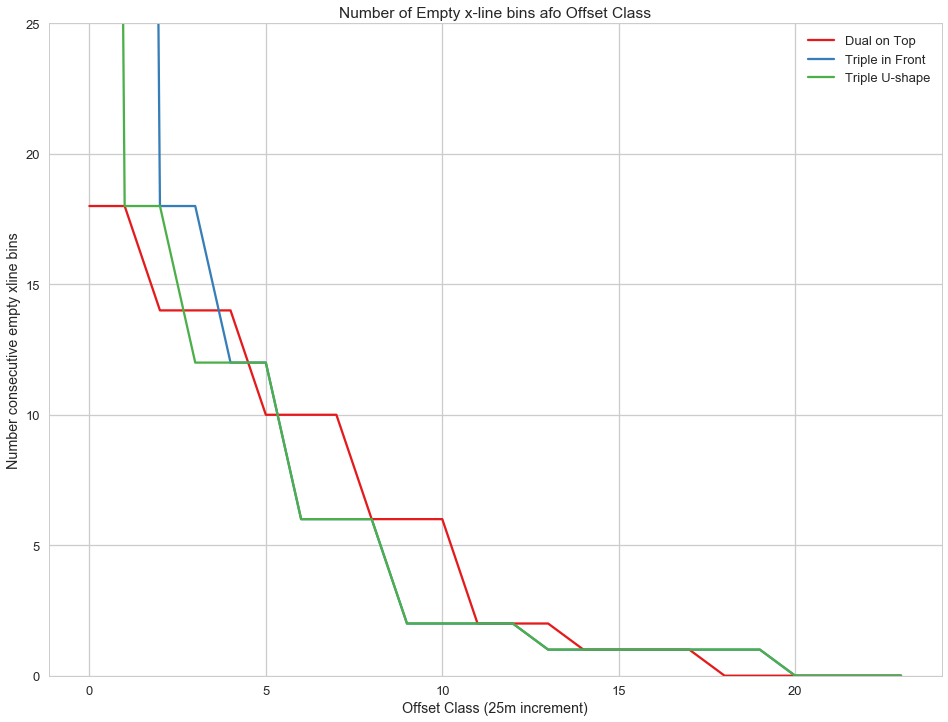

In [68]:
plt.figure(figsize=(16, 12))
sns.set_style('whitegrid')
plt.plot(count_dual_offset, label='Dual on Top')
plt.plot(count_triple_offset, label='Triple in Front')
plt.plot(count_triple_U_offset, label='Triple U-shape')
plt.legend()
plt.xlabel('Offset Class (25m increment)')
plt.ylabel('Number consecutive empty xline bins')
plt.title('Number of Empty x-line bins afo Offset Class')
plt.ylim(0, 25)

In [69]:
np.shape(count_dual_offset)

(24,)

In [70]:
df_count_dual_offset = pd.DataFrame(data=count_dual_offset, columns=['Empty Bins'])
df_count_triple_offset = pd.DataFrame(data=count_triple_offset, columns=['Empty Bins'])
df_count_triple_U_offset = pd.DataFrame(data=count_triple_U_offset, columns=['Empty Bins'])

In [71]:
len(df_count_dual_offset)

24

In [72]:
len(offset_planes)

24

In [73]:
df_count_dual_offset['Offset Class'] = offset_planes
df_count_triple_offset['Offset Class'] = offset_planes
df_count_triple_U_offset['Offset Class'] = offset_planes

In [74]:
dual_bin_size = 18.75
triple_bin_size = 12.5

In [75]:
count_dual_offset_m = count_dual_offset*dual_bin_size + dual_bin_size
count_triple_offset_m = count_triple_offset*triple_bin_size + triple_bin_size
count_triple_U_offset_m = count_triple_U_offset*triple_bin_size + triple_bin_size

(0, 500)

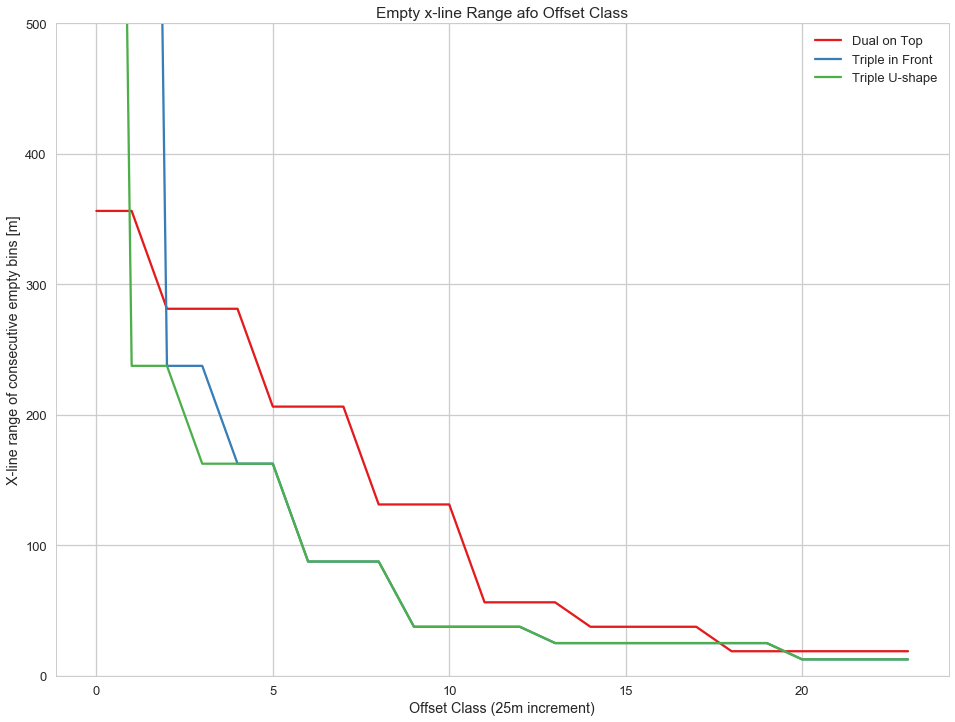

In [76]:
plt.figure(figsize=(16, 12))
plt.plot(count_dual_offset_m, label='Dual on Top')
plt.plot(count_triple_offset_m, label='Triple in Front')
plt.plot(count_triple_U_offset_m, label='Triple U-shape')
plt.legend()
plt.xlabel('Offset Class (25m increment)')
plt.ylabel('X-line range of consecutive empty bins [m]')
plt.title('Empty x-line Range afo Offset Class')
plt.ylim(0, 500)

In [77]:
df_count_dual_offset['Empty Range'] = df_count_dual_offset['Empty Bins']*dual_bin_size + dual_bin_size
df_count_triple_offset['Empty Range'] = df_count_triple_offset['Empty Bins']*triple_bin_size + triple_bin_size
df_count_triple_U_offset['Empty Range'] = df_count_triple_U_offset['Empty Bins']*triple_bin_size + triple_bin_size

In [78]:
df_count_dual_offset['Config'] = 'Dual Source on Top'
df_count_triple_offset['Config'] = 'Triple Source in Front'
df_count_triple_U_offset['Config'] = 'Triple Source U-shaped front'

In [79]:
df_count_all = pd.concat([df_count_dual_offset, df_count_triple_offset, df_count_triple_U_offset])

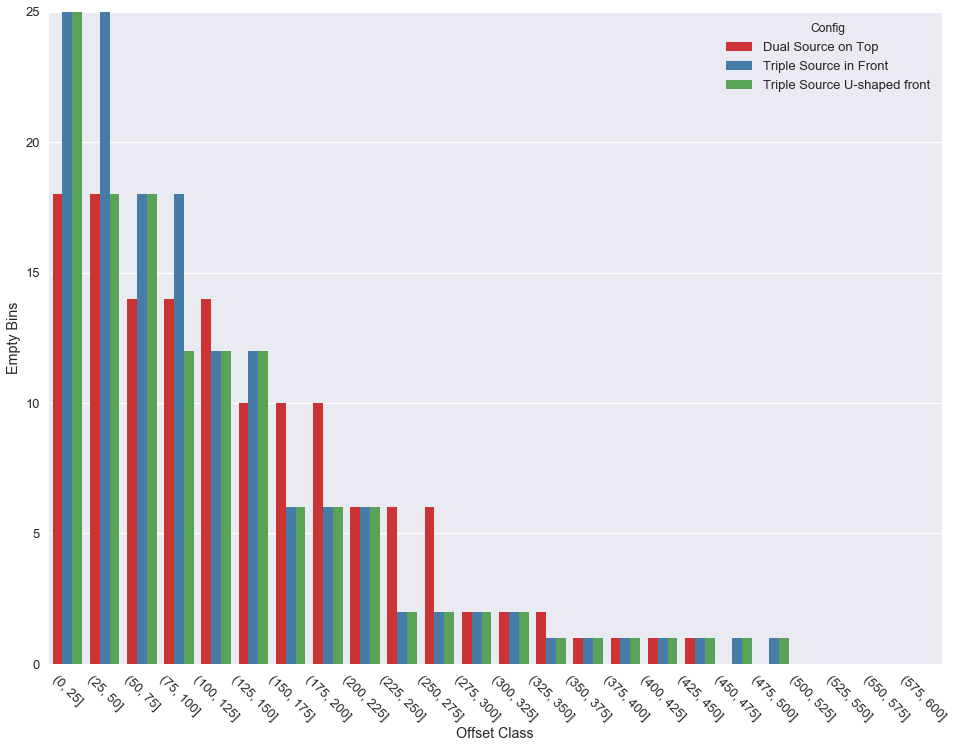

In [80]:
sns.set_style('darkgrid')
plt.figure(figsize=(16, 12))
sns.barplot(x='Offset Class', y='Empty Bins', data=df_count_all, hue='Config')
plt.ylim(0, 25)
plt.xticks(rotation=-45);

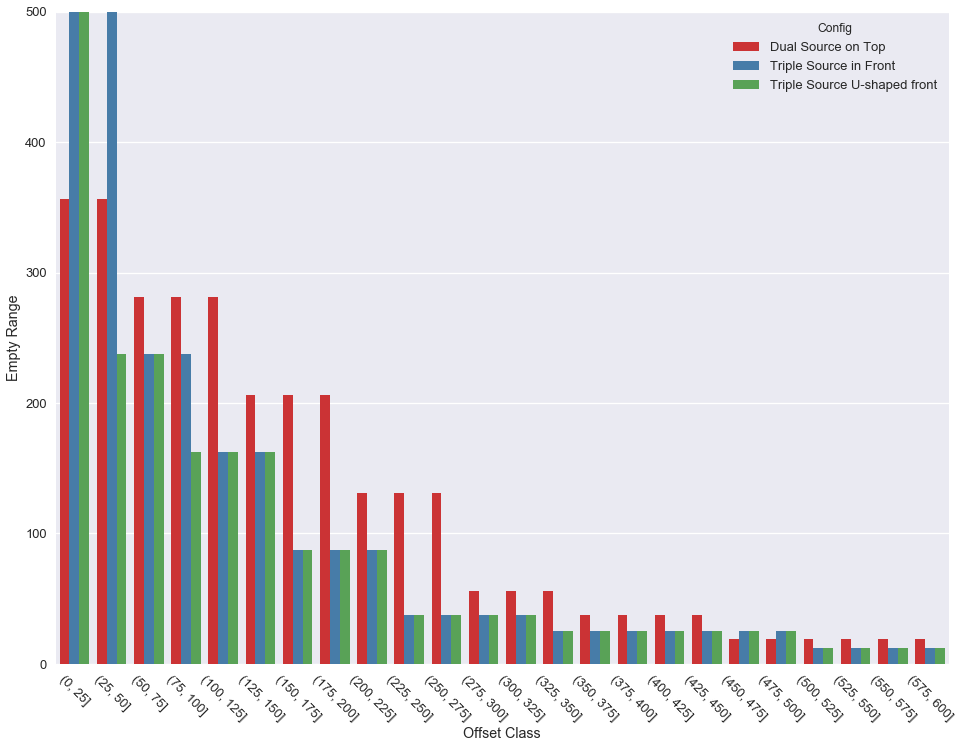

In [81]:
plt.figure(figsize=(16, 12))
sns.barplot(x='Offset Class', y='Empty Range', data=df_count_all, hue='Config')
plt.ylim(0, 500)
plt.xticks(rotation=-45);